# ESSENTIAL PREPROCESSING TECHNIQUES TO BUILD A GOOD MACHINE LEARNING

This demo shows you some of the good practices in data understanding and preprocessing. The process are not limited only to the following. There are always alternative methods you may try and different datasets requires different treatment.


In this demo we will be doing the following:

• Removing and imputing missing values from the dataset


• Getting categorical data into shape for machine learning algorithms


• Selecting relevant features for the model construction

### TITANIC DATASET

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# Importing common libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data=pd.read_csv("Titanic_Survival.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## REMOVING AND IMPUTING MISSING VALUES

In [4]:
#check column with NaN
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#check percentage of missing in every column
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%
Percent of missing "Cabin" records is 77.10%
Percent of missing "Embarked" records is 0.22%


Decision:

    1. Overview Age first
    2. Drop Cabin column as number of missing too big
    3. Embarked can be imputed

### AGE

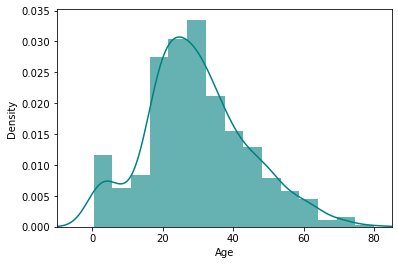

In [6]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [7]:
#how to impute using median
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)

### CABIN

In [8]:
#DROP this column
data.drop('Cabin', axis=1, inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### EMBARKED

In [10]:
data.Embarked.dtypes

dtype('O')

In [11]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

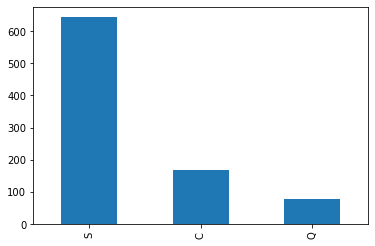

In [12]:
data['Embarked'].value_counts().plot(kind='bar')

In [13]:
#try to impute missing with major class. 
#fillna is used to replace missing value.
#idxmax highest value
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [14]:
#CHECK REMAINING
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## HANDLING CATEGORICAL DATA

In [16]:
#we spot PassengerID, Name and Ticket is just form of identifier.

In [17]:
#check id
data.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [18]:
#check name
data.Name.value_counts()

Beane, Mr. Edward                       1
Zabour, Miss. Thamine                   1
Sage, Mr. Douglas Bullen                1
Boulos, Mrs. Joseph (Sultana)           1
Bazzani, Miss. Albina                   1
                                       ..
Douglas, Mr. Walter Donald              1
Hold, Mr. Stephen                       1
Doling, Mrs. John T (Ada Julia Bone)    1
Rommetvedt, Mr. Knud Paust              1
Nicola-Yarred, Master. Elias            1
Name: Name, Length: 891, dtype: int64

In [19]:
#check ticket
data.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
CA 2144     6
3101295     6
           ..
349206      1
343275      1
226875      1
348123      1
19952       1
Name: Ticket, Length: 681, dtype: int64

inference: passengerId and Name are identifier. We assume ticket refers to identifier under the same purchase

In [20]:
data[data.Ticket=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S


In [21]:
data[data.Ticket=='347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S


inference: we see same ticket has same last name (family) and same fare. this inform whether the passenger travel alone or in group and how many are in the group. 

### EXTRACT NEW FEATURE

In [22]:
#extract new feature from ticket
data['Group'] = data.groupby('Ticket')['Ticket'].transform('count')

In [23]:
#Compare Group and total row to check
data[data.Ticket=='347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S,6
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S,6
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S,6
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S,6
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S,6
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S,6


In [24]:
#extract TravelAlone to define whether a passenger travel alone or not. 1 travel alone, 0 in group.
data['TravelAlone']=np.where((data["Group"])>1, 0, 1)

In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


In [26]:
#we can now drop ticket, Name and set PassengerId as index
data.drop('Ticket', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.set_index('PassengerId', inplace=True)

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,1
2,1,1,female,38.0,1,0,71.2833,C,1,1
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


### ENCODE CATEGORICAL FEATURE

In [28]:
data.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Group            int64
TravelAlone      int32
dtype: object

#### ENCODE USING REPLACE

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,1
2,1,1,female,38.0,1,0,71.2833,C,1,1
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


In [30]:
#convert object to numerical category
data['Sex'] = data.Sex.replace('male',0).replace('female',1).astype(np.int)

<ipython-input-30-121ab8bb5033>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Sex'] = data.Sex.replace('male',0).replace('female',1).astype(np.int)


In [31]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#convert object to numerical category
data['Embarked'] = data.Embarked.replace('S',1).replace('C',2).replace('Q',3).astype(np.int)

<ipython-input-32-982a27a3c82d>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Embarked'] = data.Embarked.replace('S',1).replace('C',2).replace('Q',3).astype(np.int)


In [33]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group,TravelAlone
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,1,1
2,1,1,1,38.0,1,0,71.2833,2,1,1
3,1,3,1,26.0,0,0,7.9250,1,1,1
4,1,1,1,35.0,1,0,53.1000,1,2,0
5,0,3,0,35.0,0,0,8.0500,1,1,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,1,1,1
888,1,1,1,19.0,0,0,30.0000,1,1,1
889,0,3,1,28.0,1,2,23.4500,1,2,0


## Train the model using KNN classifier 

In [63]:
X=data.drop('Survived', axis=1)
y=data.Survived

In [64]:
#splitting the dataset into trainning and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)#start from 0 -random_state=0 , we get the same train and test sets across different executions.

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit_transform() is used on the training data so that we can scale the training data and also 
#learn the scaling parameters of that data
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train,y_train)
#Fit the k-nearest neighbors classifier from the training dataset
y_pred = knn.predict(X_test)
#y_pred is the predicted value from the model

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#calculates the accuracy score for a set of predicted labels against the true labels.

0.7985074626865671

In [70]:
report = classification_report(y_test, y_pred)
print(report)
#1. Precision: Percentage of correct positive predictions relative to total positive predictions.

#2. Recall: Percentage of correct positive predictions relative to total actual positives.

#3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

#F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.74      0.70      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



## SELECTING RELEVANT FEATURES

In [71]:
#USING FEATURE IMPORTANCE FROM RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

fi=RandomForestClassifier()
fi.fit(X,y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(fi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.258
Age,0.245
Fare,0.244
Pclass,0.076
Group,0.060
SibSp,0.039
Parch,0.033
Embarked,0.032
TravelAlone,0.013


<AxesSubplot:ylabel='feature'>

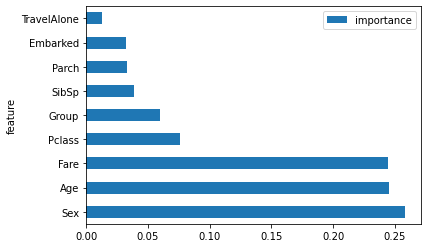

In [72]:
importances.plot(kind='barh')

In [73]:
#let's experiment with top feature as well
top_col=['Sex','Age','Fare','Pclass','Group','SibSp','Survived']
top_col

['Sex', 'Age', 'Fare', 'Pclass', 'Group', 'SibSp', 'Survived']

In [75]:
#using top column
data_top=data[[c for c in data.columns if c in top_col]]
data_top.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Group
PassengerId,,,,,,,
1,0,3,0,22.0,1,7.2500,1
2,1,1,1,38.0,1,71.2833,1
3,1,3,1,26.0,0,7.9250,1
4,1,1,1,35.0,1,53.1000,2
5,0,3,0,35.0,0,8.0500,1


In [80]:
X_top=data_top_enc.drop('Survived', axis=1)
y_top=data.Survived


In [81]:
#splitting the dataset into trainning and test set
from sklearn.model_selection import train_test_split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.30, random_state=0)#start from 0 -random_state=0 , we get the same train and test sets across different executions.


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit_transform() is used on the training data so that we can scale the training data and also 
#learn the scaling parameters of that data
X_train=scaler.fit_transform(X_train_top)
X_test=scaler.transform(X_test_top)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train,y_train_top)
#Fit the k-nearest neighbors classifier from the training dataset
y_pred = knn.predict(X_test_top)
#y_pred is the predicted value from the model

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_top, y_pred)
#calculates the accuracy score for a set of predicted labels against the true labels.

0.6716417910447762

In [85]:
data_enc = pd.get_dummies(data, columns=["Pclass","Embarked"])

In [87]:
data_enc.head

<bound method NDFrame.head of             Survived Sex   Age  SibSp  Parch     Fare  Group TravelAlone  \
PassengerId                                                                
1                  0   0  22.0      1      0   7.2500      1           1   
2                  1   1  38.0      1      0  71.2833      1           1   
3                  1   1  26.0      0      0   7.9250      1           1   
4                  1   1  35.0      1      0  53.1000      2           0   
5                  0   0  35.0      0      0   8.0500      1           1   
...              ...  ..   ...    ...    ...      ...    ...         ...   
887                0   0  27.0      0      0  13.0000      1           1   
888                1   1  19.0      0      0  30.0000      1           1   
889                0   1  28.0      1      2  23.4500      2           0   
890                1   0  26.0      0      0  30.0000      1           1   
891                0   0  32.0      0      0   7.7500     

In [88]:
data_top_enc = pd.get_dummies(data_top, columns=["Pclass"])

In [89]:
data_top_enc

,Survived,Sex,Age,SibSp,Fare,Group,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,0,0,22.0,1,7.2500,1,0,0,1
2,1,1,38.0,1,71.2833,1,1,0,0
3,1,1,26.0,0,7.9250,1,0,0,1
4,1,1,35.0,1,53.1000,2,1,0,0
5,0,0,35.0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,0,27.0,0,13.0000,1,0,1,0
888,1,1,19.0,0,30.0000,1,1,0,0
889,0,1,28.0,1,23.4500,2,0,0,1


In [90]:
X_top=data_top_enc.drop('Survived', axis=1)
y_top=data.Survived

In [92]:
from sklearn.model_selection import train_test_split


#training and testing split using feature from rf Feature Importance
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=1, stratify=y)


In [93]:
X_top

,Sex,Age,SibSp,Fare,Group,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,
1,0,22.0,1,7.2500,1,0,0,1
2,1,38.0,1,71.2833,1,1,0,0
3,1,26.0,0,7.9250,1,0,0,1
4,1,35.0,1,53.1000,2,1,0,0
5,0,35.0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...
887,0,27.0,0,13.0000,1,0,1,0
888,1,19.0,0,30.0000,1,1,0,0
889,1,28.0,1,23.4500,2,0,0,1


In [94]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_train_top=scaler.fit_transform(X_train_top)
X_test_top=scaler.transform(X_test_top)

In [95]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_top = DecisionTreeClassifier()

model_top=model_top.fit(X_train_top,y_train_top)

In [96]:
y_test_pred_top=model_top.predict(X_test_top)

In [97]:
report = classification_report(y_test_pred_top, y_test_top)
print("Result using Top Feature")
print(report)

Result using Top Feature
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       171
           1       0.66      0.70      0.68        97

    accuracy                           0.76       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.76      0.76      0.76       268

